In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "DENS_Model/logs/training_metrics.csv"

In [7]:
data = np.loadtxt(path, delimiter=",", skiprows=1)

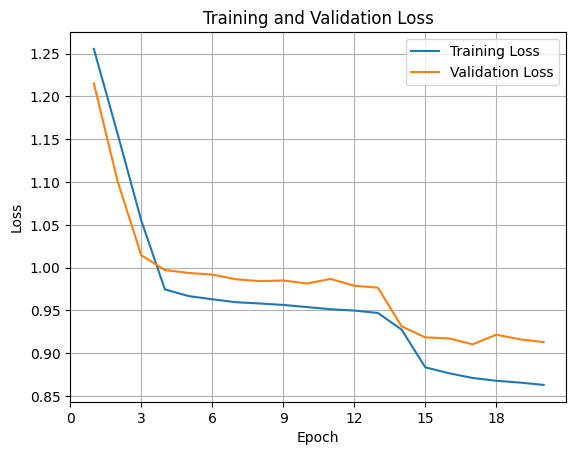

In [11]:
# plot training and validation loss
plt.plot(data[:, 0], data[:, 1], label="Training Loss")
plt.plot(data[:, 0], data[:, 3], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(0, data[-1, 0], 3))
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

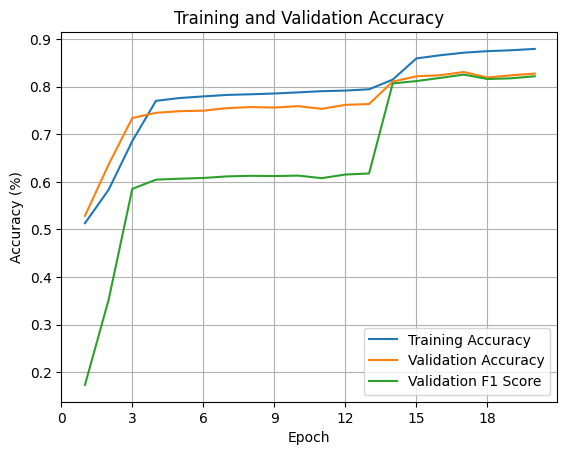

In [15]:
# plot training and validation accuracy
plt.figure()
plt.plot(data[:, 0], data[:, 2], label="Training Accuracy")
plt.plot(data[:, 0], data[:, 4], label="Validation Accuracy")
plt.plot(data[:, 0], data[:, 5], label="Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.xticks(np.arange(0, data[-1, 0], 3))
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

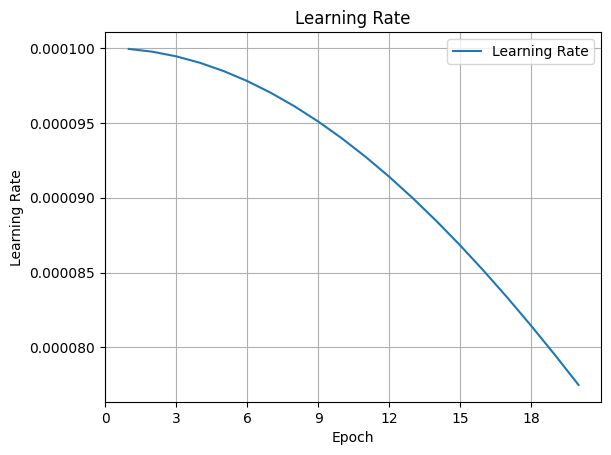

In [17]:
# plot validation learning rate
plt.figure()
plt.plot(data[:, 0], data[:, 6], label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.xticks(np.arange(0, data[-1, 0], 3))
plt.title("Learning Rate")
plt.legend()
plt.grid()
plt.show()

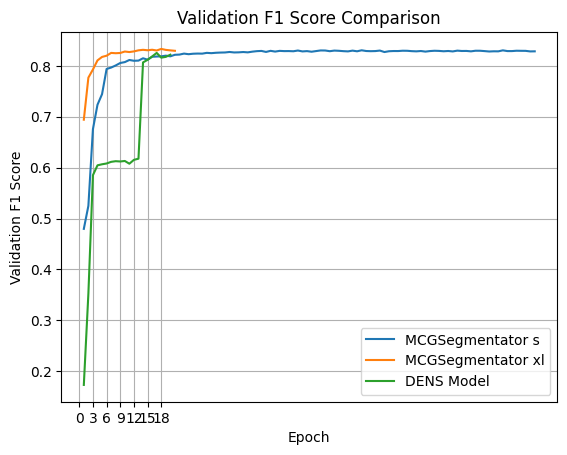

In [18]:
# val f1 score comparison

mcg_segmentator_s = np.loadtxt("MCGSegmentator_s/logs/training_metrics.csv", delimiter=",", skiprows=1)
mcg_segmentator_xl = np.loadtxt("MCGSegmentator_xl/logs/training_metrics.csv", delimiter=",", skiprows=1)
dens_model = np.loadtxt("DENS_Model/logs/training_metrics.csv", delimiter=",", skiprows=1)

plt.figure()
plt.plot(mcg_segmentator_s[:, 0], mcg_segmentator_s[:, 5], label="MCGSegmentator s")
plt.plot(mcg_segmentator_xl[:, 0], mcg_segmentator_xl[:, 5], label="MCGSegmentator xl")
plt.plot(dens_model[:, 0], dens_model[:, 5], label="DENS Model")
plt.xlabel("Epoch")
plt.ylabel("Validation F1 Score")
plt.xticks(np.arange(0, dens_model[-1, 0], 3))
plt.title("Validation F1 Score Comparison")
plt.legend()
plt.grid()
plt.show()